# 1.1 Importing the dependencies

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

# 1.2 Removing Dodgy images
### Even though the photos have appropriate file extension, they might not open up in python because they might be corrupted, misguided, misinterpreted. So this particular block will help us get rid of that.

In [2]:
import imghdr #this allows us to check the image extension of a particular image

In [3]:
data_dir = 'Images'
extension = ['jpeg','jpg','png','bmp']
os.listdir(data_dir)

['happy', 'Sad']

In [5]:
img = cv2.imread(os.path.join('Images','happy','image14.jpeg'))
img.shape

(183, 275, 3)

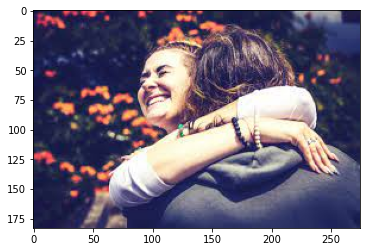

In [7]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #this is because opencv reads in an image in BGR
#matplotlib expects it to be rgb, so to fix this, we have to mention this line of code.
plt.show()

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in extension:
                print("Image not in extension list")
                os.remove(image_path)
        except Exception as e:
            print("Issue with image")



Image not in extension list
Image not in extension list
Image not in extension list
Image not in extension list
Image not in extension list
Image not in extension list
Image not in extension list


# 1.3 Load Data

In [15]:
import numpy as np
dataset = tf.keras.utils.image_dataset_from_directory('Images',batch_size=16) #this going to build all the labels
#and classes on its own and we have to do nothing and it also do some preprocessing of the images as well.

Found 73 files belonging to 2 classes.


In [41]:
data_iterator = dataset.as_numpy_iterator()
#this will allow us to access the generator from our data pipeline
batch = data_iterator.next() #get another batch from the iterator

In [25]:
len(batch) #there's two parts to this dataset
#there is the images and then their labels
batch[0].shape #32- batch size, rest are the automatic reshape of the images done by the image dataset from directory.
#Note: we can configure all of these.

(16, 256, 256, 3)

In [26]:
batch[1] #these represents label, either happy or sad

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

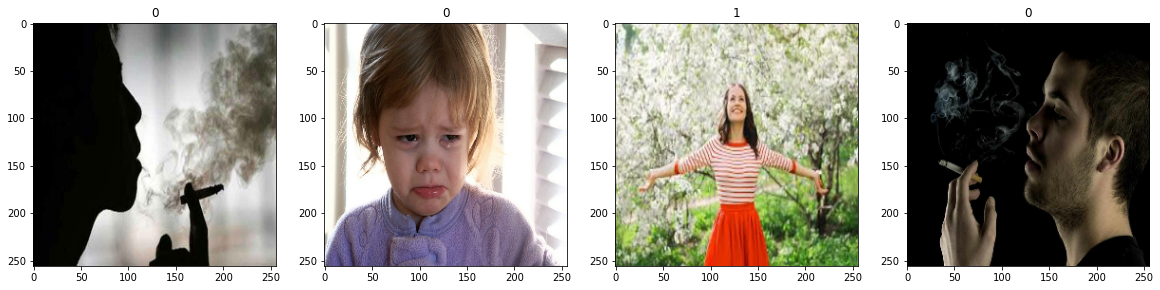

In [42]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]) #1 for happy, 0 for sad

In [43]:
scaled = batch[0] / 255
scaled.max()

1.0

# Pre-processing Data

In [44]:
data = dataset.map(lambda x,y:(x/255,y))
scaled_itr = data.as_numpy_iterator()
scaled_itr.next()[0].max()

1.0

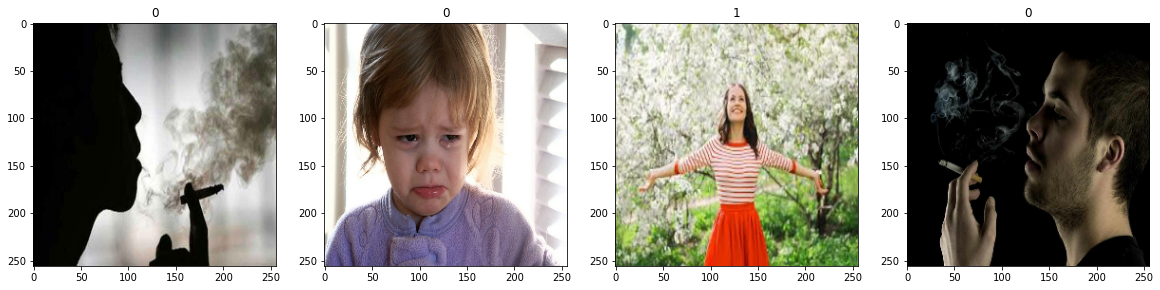

In [45]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]) #1 for happy, 0 for sad

In [58]:
len(data)

5

In [55]:
training_size = int(len(data)*.7)-1
validation_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [59]:
training_size+validation_size+test_size

5

In [60]:
train = data.take(training_size)
validate = data.skip(training_size).take(validation_size)
test = data.skip(training_size+validation_size).take(test_size)

# Deep Learning Model

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
model = Sequential()

In [63]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [64]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [68]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [69]:
history = model.fit(train,epochs=20,validation_data=validate,callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 9s 4s/step - loss: 2.2001 - accuracy: 0.5312 - val_loss: 1.1623 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 6s 4s/step - loss: 1.2704 - accuracy: 0.5312 - val_loss: 1.1282 - val_accuracy: 0.6250
Epoch 3/20
2/2 [==============================] - 4s 3s/step - loss: 1.1282 - accuracy: 0.5625 - val_loss: 0.9242 - val_accuracy: 0.5312
Epoch 4/20
2/2 [==============================] - 4s 3s/step - loss: 0.8722 - accuracy: 0.5625 - val_loss: 0.7076 - val_accuracy: 0.5938
Epoch 5/20
2/2 [==============================] - 5s 3s/step - loss: 0.7094 - accuracy: 0.5312 - val_loss: 0.6793 - val_accuracy: 0.6250
Epoch 6/20
2/2 [==============================] - 5s 3s/step - loss: 0.6798 - accuracy: 0.6562 - val_loss: 0.6762 - val_accuracy: 0.5625
Epoch 7/20
2/2 [==============================] - 5s 3s/step - loss: 0.6713 - accuracy: 0.6562 - val_loss: 0.6459 - val_accuracy: 0.7500
Epoch 8/20
2/2 [=========================

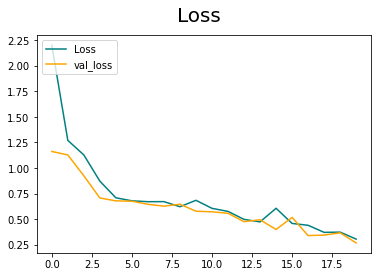

In [70]:
fig = plt.figure()
plt.plot(history.history['loss'],color='teal',label='Loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

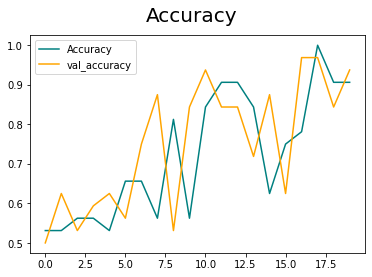

In [71]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='Accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluating the model

In [73]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [74]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

In [75]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Test

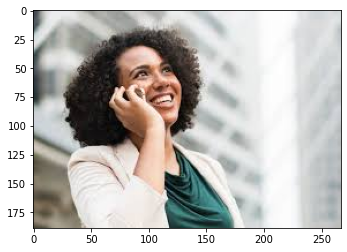

In [96]:
import cv2
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

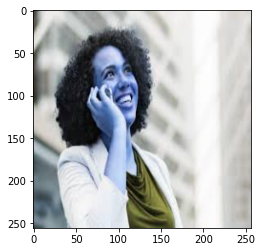

In [97]:
resized = tf.image.resize(img,(256,256))
plt.imshow(resized.numpy().astype(int))
plt.show

In [98]:
yhat = model.predict(np.expand_dims(resized/255,0))
yhat

array([[0.1841107]], dtype=float32)

In [99]:
if yhat > 0.5:
    print("Happy")
else:
    print("Sad")

Sad


# Save the Model

In [101]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','ImageClassifierModel.h5'))

In [102]:
reload_model = load_model(os.path.join('models','ImageClassifierModel.h5'))

In [103]:
reload_model.predict(np.expand_dims(resized/255,0))

array([[0.1841107]], dtype=float32)